## 데이터 준비

이전에는 생선이 도미에 속하는지 빙어에 속하는지 '**분류**'하는 문제를 다룸<br>
이제는 생선의 크기나 길이를 보고 생선의 무게를 예측하는 문제를 다룸 즉, **임의의 어떤 숫자를 예측하는** <span style="color:red">회귀(Regression)</span>하는 문제를 다룸<br>
<span style="color:red">K-NN Regression(K-최근접 이웃 회귀) 알고리즘</span>은 **주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식**이다.

<span style="color:blue">KNeighborsRegressor</span>에 대하여<br>
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)<br>
><span style="color:green">n_neighbors</span>:int<br>
**이웃의 수인 K 결정 default는 5**<br><br>
<span style="color:green">weights</span>:{'uniform','distance'} or callable<br>
**예측에 사용되는 가중 방법을 결정함** default는 uniform<br>
'uniform': 각각의 이웃이 모두 동일한 가중치<br>
'distance':거리가 가까울수록 더 높은 가중치<br>
'callable':사용자가 직접 정의한 함수를 사용할 수 있음, 거리와 가중치자 저장된 배열을 반환해야함<br><br>
<span style="color:green">algorithm</span>:{'auto','ball_tree','kd_tree','brute'<br>
**가장 가까운 이웃들을 계산하는 데 사용한는 알고리즘 결정**<br><br>
<span style="color:green">leaf_size</span>:int<br>
**Ball-tree나 KD-tree의 leaf size를 결정**<br>
트리를 저장할 메모리 그리고 구성과 쿼리 처리 속도에 영향<br><br>
<span style="color:green">p</span>:int<br>
**민코프스키 미터법(Minkowski)의 차수 결정**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data=pd.read_csv('chap3.csv')
cols=data.columns[~data.columns.str.startswith('Unnamed:')]
data1=data[cols]
print(data1.head())

   length  weight
0     8.4     5.9
1    13.7    32.0
2    15.0    40.0
3    16.2    51.5
4    17.4    70.0


In [82]:
length=data['length'].to_numpy()
weight=data['weight'].to_numpy()

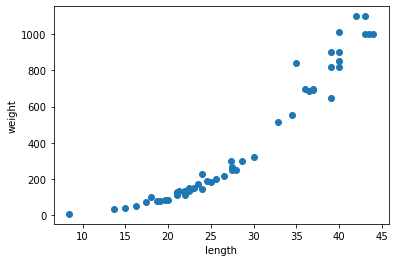

In [83]:
plt.scatter(length,weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
'''
이전에는 랜덤과 인덱스를 사용하여 분리했지만 train_test_split으로 간단하게 분리할 수 있음
array는 length, weight
test_size는 테스트 셋의 크기 비율을 결정 여기서는 default
train_size는 test_size와 동일하게 훈련 셋의 비율을 결정 default는 테스트 셋을 제외한 나머지
'''
train_input, test_input, train_target, test_target = train_test_split(length,weight,random_state=42)

In [86]:
print(train_input.shape,test_input.shape)

(42,) (14,)


In [87]:
#사이킷런에서는 2차원 배열로 훈련해야함 그래서 length가 1차원 배열이여서 train_input, test_input도 1차원 배열임
#2차원 배열로 바꿔주는 게 바로 reshape()
train_input=train_input.reshape(42,1)#reshape(-1,1)와 동일
test_input=test_input.reshape(-1,1)#-1로 지정하면 배열의 원소 개수 정확히 모르더라고 크기 쉽게 변경 가능

In [88]:
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


## 결정 계수(R^2)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
knr=KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [91]:
knr.score(test_input,test_target)

0.992809406101064

In [92]:
from sklearn.metrics import mean_absolute_error

In [93]:
predict_target=knr.predict(test_input)
mae=mean_absolute_error(test_target,predict_target) #평균 절댓값 오차를 계산
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [94]:
print(knr.score(train_input,train_target))#테스트 세트 점수보다 낮음=>과소적합

0.9698823289099254


In [95]:
knr.n_neighbors=3 #기본값 5에서 3으로 줄임
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [96]:
print(knr.score(test_input,test_target)) #훈련 세트 점수가 더 크고 차이도 크지 않아서 적합

0.9746459963987609


In [97]:
predict_target=knr.predict(test_input)
mae=mean_absolute_error(test_target,predict_target) #평균 절댓값 오차를 계산
print(mae)

35.42380952380951


## 확인문제

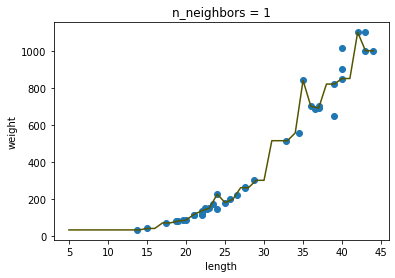

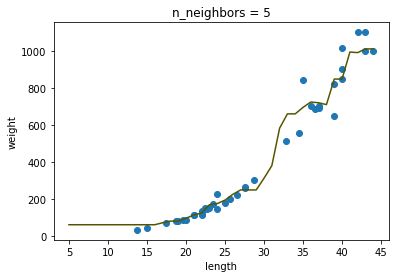

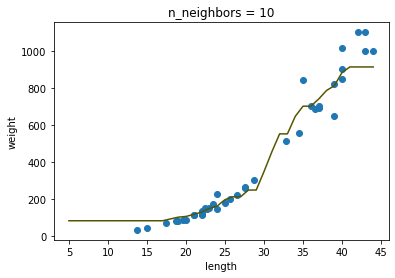

In [100]:
knr=KNeighborsRegressor()

x=np.arange(5,45).reshape(-1,1)

for i in [1,5,10]:
    knr.n_neighbors=i
    knr.fit(train_input,train_target)
    predict_target=knr.predict(x)
    plt.scatter(train_input,train_target)
    plt.plot(x,predict_target,c="#555500")
    plt.title('n_neighbors = {}'.format(i))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [99]:
knr=KNeighborsRegressor()

maelist=[]

for i in range(1,20):
    knr.n_neighbors=i
    knr.fit(train_input,train_target)
    knr.score(test_input,test_target)
    predict_target=knr.predict(test_input)
    mae=mean_absolute_error(test_target,predict_target)
    maelist.append((i,mae))
print(maelist)
    

[(1, 22.685714285714287), (2, 35.292857142857144), (3, 35.42380952380951), (4, 28.38214285714286), (5, 19.157142857142862), (6, 28.388095238095243), (7, 32.512244897959185), (8, 34.88214285714286), (9, 43.987301587301594), (10, 39.24285714285714), (11, 43.43896103896105), (12, 44.405952380952385), (13, 45.42197802197802), (14, 48.06836734693877), (15, 49.852380952380955), (16, 50.096428571428575), (17, 60.017647058823535), (18, 65.17777777777778), (19, 69.05413533834586)]
